# CODER HOUSE
##Data Science I: Fundamentos para la Ciencia de Datos

#### Viernes 18/10/2024

#### Trabajo Final

#### Comisión 61645

#### Profesora Laura Putrino, tutores Luciano Lisachi y Patricio Neri Garcia



#### Patricio Emmanuel Dueñas


Contexto: la idea en principio fue analizar las estadísticas de todos los jugadores para una determinada temporada y solo en un formato de liga local. Para eso se formó un dataframe utilizando la librería de python LanusStats, la cual te da acceso a las estadísticas que figuran en varias páginas importantes de estadísticas de fútbol, en este caso se usa como referencia la página (https://fbref.com/en/) La hipótesis fue que con esos datos se podría idear un sistema utilizando un algoritmo, que para ese entonces no tenía bien definido y termino inclinándome por el tipo no supervisado, al encontrar difusa o compleja de aislar la variable "y", de machine learning para encontrar subtítulos ideales teniendo en cuenta las especificidades del rol o posición en la cancha, es decir si son delanteros y de qué tipo o cualquiera otra posición. Para lograr que el sistema encuentre el reemplazo para la posición en particular que se esté buscando el plan es seleccionar de todas las estadísticas solo las más determinantes para el rol en cuestión. En este caso se intentaba reemplazar una posición algo mixta, y vale aclarar que tengo como referencia al Club Boca Jrs. (del cual mantengo amplio conocimiento con respecto los jugadores de su plantilla y de las diferentes temporadas) para la temporada 2023, como la de mediocampista central en sus dos variables tácticas de "5 o doble 5" lo cual le agrego un desafío extra y se vio expresado en los resultados. Los resultados fueron algo "caóticos", ya que la gran cantidad de jugadores hizo que se superpusieran muchas instancias en las gráficas y complico la identificación de los grupos, intente sin éxito por ahora solucionar esa cuestión, pero de todas formas creo que fueron resultados positivos, ya que notaron también aparecioner rasgos interesantes. Siendo el más importante la presencia casi destacada del volante central  que incorporo Boca Jrs para la temporada 2024, a saber Ignacio Miramón (https://www.ole.com.ar/boca-juniors/ahora-oficial-ignacio-miramon-sexto-refuerzo-boca_0_2446nCxM3Z.html). Otras aristas a tener en cuenta son la presencia de outliers en los primeros intentos de entrenamiento del modelo e inclusive en el modelo refinado. En parte, pude solucionar esa cuestión ajustando la variedad de columnas que seleccionaba para entrenar el modelo, siendo que en  principio aparecía muchos delanteros y en especial centro delanteros con el aparente peso de los goles, las asistencias y estadísticas similares. Quedando casi manifiesto en un modelo donde la instancia Marco Pérez queda como claro outlier superando al resto de todo el DF (https://www.infobae.com/colombia/2024/01/01/el-colombiano-marco-perez-se-corono-como-el-maximo-goleador-liguero-de-latinoamerica-en-2023/#:~:text=El%20delantero%20oriundo%20de%20Quibd%C3%B3,haber%20marcado%2023%20tantos%20tambi%C3%A9n.)

En conclusión el modelo podría funcionar mejor si se reducirán las instancias y se limitaran por ejemplo para el puesto y alguno similar, en este caso podría haber sido para el de "5 y doble 5" pero entonces creo que el data frame no cumpliría las condiciones iniciales para la aprobación de la cursada. De todas formas creo que al encontrar en los clusters o grupos medios una mayoría de jugadores esperados y en particular la presencia de la instancia "Ignacio Miramon", que termina siendo el refuerzo del club de referencia para el trabajo en la temporada 2024, deja una sensación positiva. Entonces no cumple con las expectativas iniciales, pero deja una puerta abierta para poder mejorar y lograr dicho objetivo.


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

In [26]:
pd.set_option ('display.max_rows', None)

In [20]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
%cd '/content/gdrive/MyDrive/TrabajoFinalDS1'

/content/gdrive/MyDrive/TrabajoFinalDS1


In [23]:
df_Futbol= pd.read_csv('df_F.csv')

In [25]:
df_Futbol.head()

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
0,Ramón Ábila,ar ARG,FW,Colón,Primera Division Argentina,33,1989,25,17,17.5,...,0,6.0,22.0,26.0,3.0,5.0,4.0,1.0,0.0,0
1,Gonzalo Abrego,ar ARG,MF,Godoy Cruz,Primera Division Argentina,23,2000,26,26,23.7,...,0,19.0,10.0,3.0,20.0,21.0,30.0,0.0,0.0,0
2,Jonás Acevedo,ar ARG,"MF,FW",Huracán,Primera Division Argentina,25,1997,16,10,9.4,...,0,15.0,15.0,1.0,80.0,5.0,8.0,0.0,0.0,0
3,Lucas Acevedo,ar ARG,DF,Colón,Primera Division Argentina,31,1991,6,2,2.1,...,0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0
4,Guillermo Acosta,ar ARG,MF,Atlé Tucumán,Primera Division Argentina,34,1988,25,23,20.8,...,0,25.0,23.0,0.0,11.0,26.0,29.0,0.0,1.0,0


In [24]:
df_Futbol

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
0,Ramón Ábila,ar ARG,FW,Colón,Primera Division Argentina,33,1989,25,17,17.5,...,0,6.0,22.0,26.0,3.0,5.0,4.0,1.0,0.0,0
1,Gonzalo Abrego,ar ARG,MF,Godoy Cruz,Primera Division Argentina,23,2000,26,26,23.7,...,0,19.0,10.0,3.0,20.0,21.0,30.0,0.0,0.0,0
2,Jonás Acevedo,ar ARG,"MF,FW",Huracán,Primera Division Argentina,25,1997,16,10,9.4,...,0,15.0,15.0,1.0,80.0,5.0,8.0,0.0,0.0,0
3,Lucas Acevedo,ar ARG,DF,Colón,Primera Division Argentina,31,1991,6,2,2.1,...,0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0
4,Guillermo Acosta,ar ARG,MF,Atlé Tucumán,Primera Division Argentina,34,1988,25,23,20.8,...,0,25.0,23.0,0.0,11.0,26.0,29.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,Franco Zanelatto,pe PER,"MF,FW",Alianza Lima,Primera Division Peru,22,2000,22,15,15.4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,Sebastian Zarabia,pe PER,MF,Cusco,Primera Division Peru,17,2005,1,0,0.4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2816,Héctor Zeta,pe PER,FW,Binacional,Primera Division Peru,28,1994,31,17,16.8,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2817,Patrick Zubczuk,pe PER,GK,UTC,Primera Division Peru,27,1995,34,34,33.8,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Una vez cargado el data frame selecciono las columnas que inicialmente crei como mejores para ailar la variable.
Luego con los atributos seleccionados uso el metodo del codo para encontrar la cantidad optima de clusters.

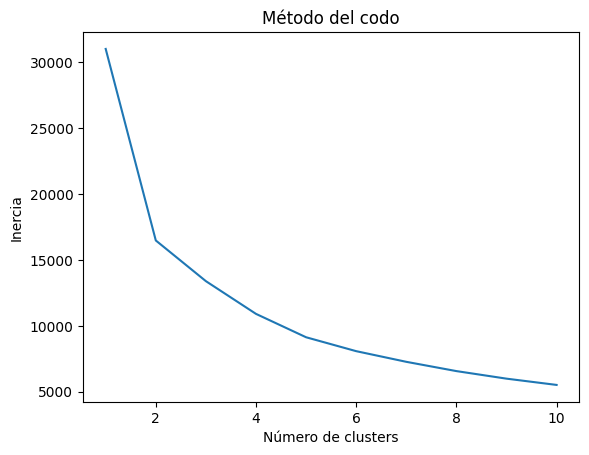

In [27]:
columnas_seleccionadas = ['shooting_Gls',
 'shooting_Sh',
 'passing_types_Att',
 'passing_types_Live',
 'passing_types_Dead',
 'possession_Def Pen',
 'possession_Mid 3rd',
 'possession_Att 3rd',
 'defense_Def 3rd',
 'defense_Mid 3rd',
 'defense_Att 3rd']

                                                                                                        # Selecciona todas las filas y las columnas específicas
X = df_Futbol[columnas_seleccionadas].values

wcss = []                                                                                               # wcss
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Ahora aplico los diferentes modelos de entrenamiento no supervisado que analizamos en clase.

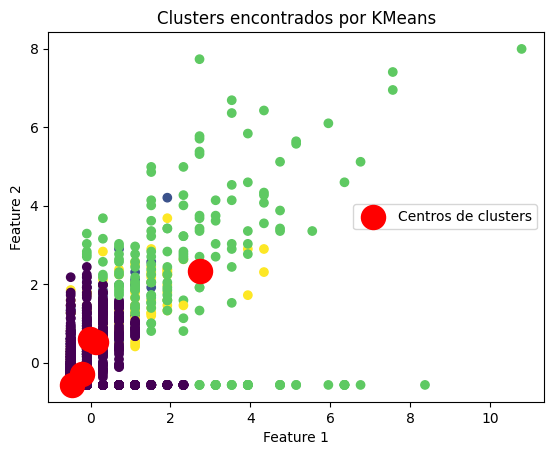

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)                                            #KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)




plt.scatter(X[:, 0], X[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centros de clusters')
plt.title('Clusters encontrados por KMeans')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.legend()



plt.title('Clusters encontrados por KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
plt.show()

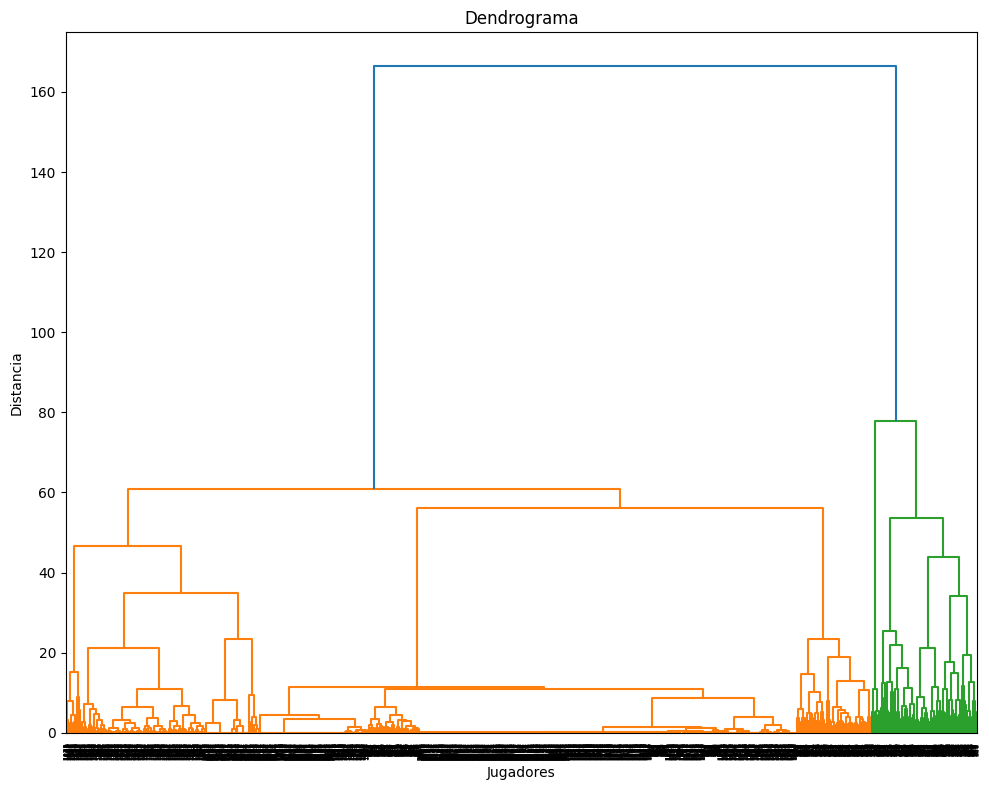

In [43]:
plt.figure(figsize=(10, 8))                                                                                                       #Dendrograma

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))


plt.title('Dendrograma')
plt.xlabel('Jugadores')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

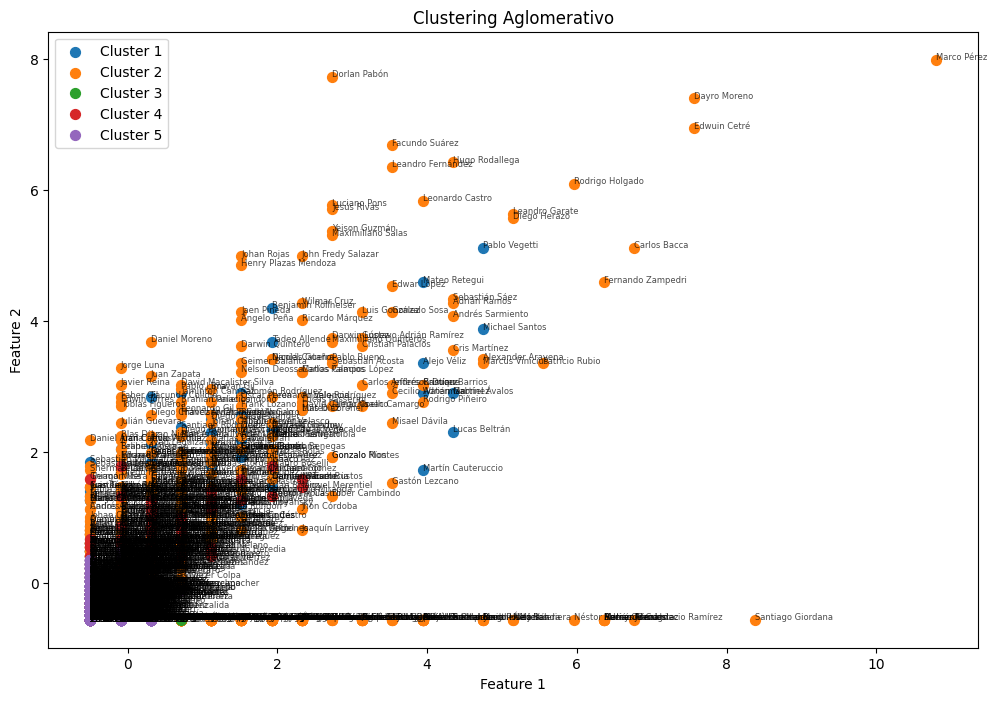

In [40]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')                                                             #AgglomerativeClustering
labels = model.fit_predict(X)

plt.figure(figsize=(12, 8))


for i in range(5):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')

                                                                                                                           # Añadir etiquetas con los nombres de los jugadors
for index, row in df_Futbol.iterrows():
    plt.annotate(row['Player'], (row[columnas_seleccionadas[0]], row[columnas_seleccionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#. clusters estimado: 16
# puntos ruidosos: 73


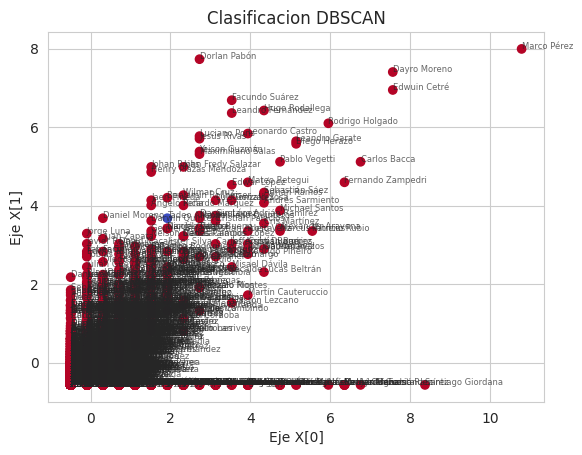

In [ ]:
num_samples_total = 1000;cluster_centers = [(3,3), (7,7)]                                                                    #DBSCAN
num_classes = len(cluster_centers)
epsilon = 2;min_samples = 2


db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)


colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
for index, row in df_F.iterrows():
    plt.annotate(row['Player'], (row[columnas_seleccionadas[0]], row[columnas_seleccionadas[1]]), fontsize=6, alpha=0.7)
plt.show()

Luego intento probar otras confiruraciones de features donde las acciones de ataque no aparecen, probe tambien diferentes cantidades de features y el mejor resultado que optuve fue esta configuracion.

In [44]:
columnas_seleccionadas3 = ['shooting_Sh','passing_types_Live','passing_types_Dead','possession_Touches','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','defense_Def 3rd','defense_Mid 3rd','defense_Att 3rd','defense_TklW']

In [46]:
X3 = df_Futbol[columnas_seleccionadas3].values

Aplico el método del codo a la nueva configuración y en este caso parece darme menor cantidad de clusters, entre 2 y 3. Luego de probar con ese número no siento una gran diferencia al número que elegí en principio. El número 5 responde a que al menos son 4 posiciones en la cancha y espero diferentes variables tácticas de algunas. Además el primer método de codos me dio como número óptimo 4 clusters.

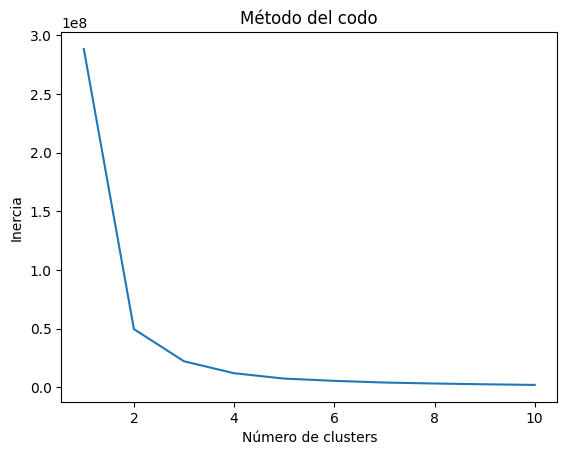

In [59]:
wcss = []                                                                                               # wcss
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

#. clusters estimado: 3
# puntos ruidosos: 842


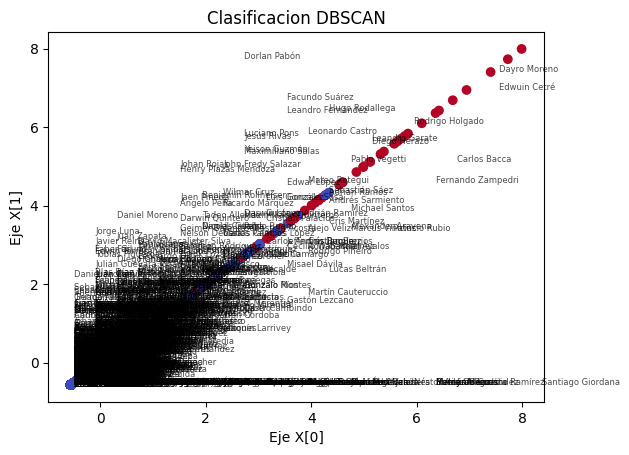

In [49]:
num_samples_total = 1000;cluster_centers = [(3,3), (7,7)]                                                                   # DBSCAN
num_classes = len(cluster_centers)
epsilon = 1.2;min_samples = 10


db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X3)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)



colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X3[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
for index, row in df_Futbol.iterrows():
    plt.annotate(row['Player'], (row[columnas_seleccionadas[0]], row[columnas_seleccionadas[1]]), fontsize=6, alpha=0.7)
plt.show()

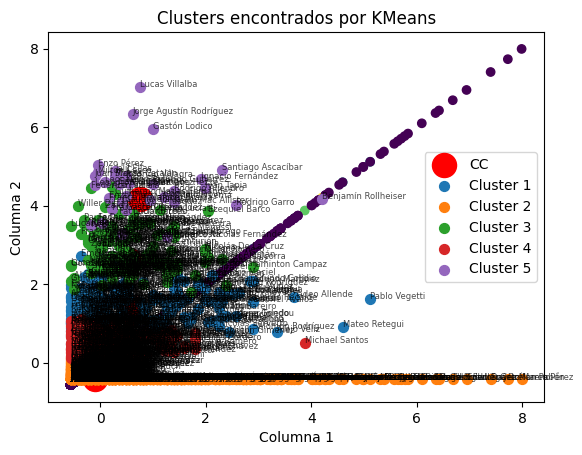

In [53]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)                                    # KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X3)




plt.scatter(X3[:, 0], X[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='CC')

for i in range(5):
    plt.scatter(X3[labels == i, 0], X3[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in df_Futbol.iterrows():
    plt.annotate(row['Player'], (row[columnas_seleccionadas3[0]], row[columnas_seleccionadas3[1]]), fontsize=6, alpha=0.7)


plt.title('Clusters encontrados por KMeans')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.legend()
plt.show()

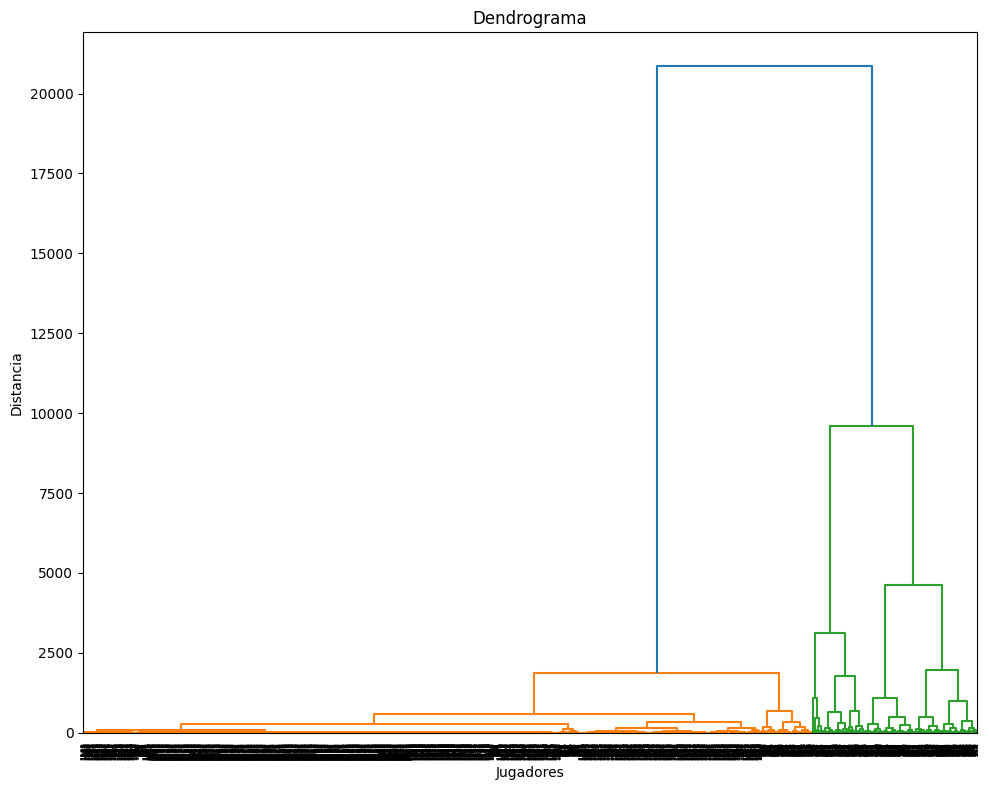

In [54]:
plt.figure(figsize=(10, 8))                                                                                                  #Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X3, method='ward'))

plt.title('Dendrograma')
plt.xlabel('Jugadores')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

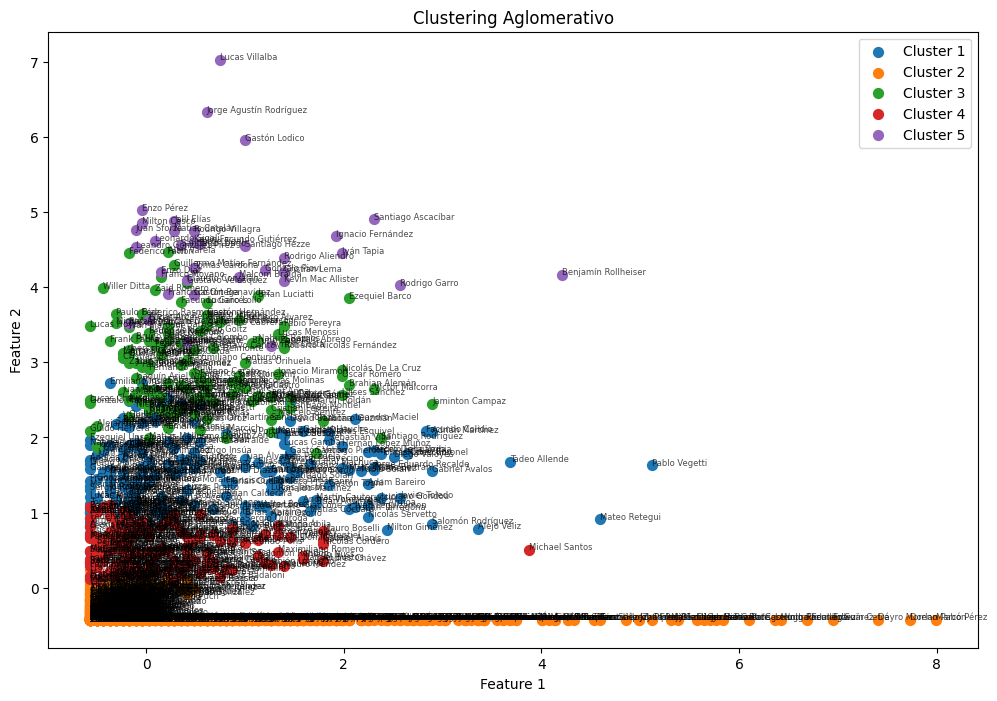

In [51]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')                                                                  #AgglomerativeClustering
labels = model.fit_predict(X3)

plt.figure(figsize=(12, 8))


for i in range(5):
    plt.scatter(X3[labels == i, 0], X3[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in df_Futbol.iterrows():
    plt.annotate(row['Player'], (row[columnas_seleccionadas3[0]], row[columnas_seleccionadas3[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Ahora visualizó las estadísticas de algunas instancias que interpreto que según el modelo podría considerar como posibles reemplazos para la platilla de jugadores en cuestión. En ese proceso es que encuentro y "Ignacion Miramon" que fue el  refuerzo de Boca jrs. en el puesto de numero 5 para la temporada siguiente, 2024, a la que forma el data frame.
Con esto no quiero decir que el modelo funcione bien pero si al menos puedo inferir que puede mejorar y que esta al menos en camino de ser funcional.

In [55]:
resultado = df_Futbol[df_Futbol['Player'] == 'Tadeo Allende']

resultado


,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
24,Tadeo Allende,ar ARG,"FW,MF",Godoy Cruz,Primera Division Argentina,23,1999,22,18,18.2,...,0,16.0,13.0,3.0,44.0,9.0,20.0,0.0,0.0,0


In [56]:
resultado2 = df_Futbol[df_Futbol['Player'] == 'Jaminton Campaz']

resultado2

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
131,Jaminton Campaz,co COL,"FW,MF",Rosario Central,Primera Division Argentina,22,2000,23,22,20.3,...,0,18.0,27.0,4.0,87.0,6.0,27.0,1.0,0.0,0


In [57]:
resultado4 = df_Futbol[df_Futbol['Player'] == 'Hugo Rodallega']

resultado4

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
1735,Hugo Rodallega,co COL,"FW,MF",Santa Fe,Primera Division Colombia,37,1985,30,19,22.3,...,0,22.0,39.0,6.0,7.0,9.0,3.0,0.0,0.0,0


In [58]:
resultado5 = df_Futbol[df_Futbol['Player'] == 'Ignacio Miramon']

resultado5

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_90s,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
475,Ignacio Miramon,ar ARG,MF,Gimnasia–LP,Primera Division Argentina,19,2003,21,20,18.8,...,0,29.0,55.0,0.0,18.0,17.0,54.0,0.0,0.0,0


# Conclusion y consideraciones finales

La conclusión con respecto al modelo, y al día de hoy, es que no es funcional. Principalmente por lo caótico de su visualización y porque todavía mantiene muchas instancias de otras posiciones tácticas diferentes a las que en teoría tendría que encontrar. Pero la presencia de las que sí estoy buscando y en un sector central mas bien tope, así como tambien formando parte del mismo cluster (para este caso el de color verde) me dejan la sensación de que se puede afinar y quizas resultar funcional.
Con respecto  los diferentes modelos, el Agromerative es el que me da los mejores resultados, seguido por el Kmeans y los otros algo confusos e inclusive alguno mucho menos precisos como el Dendrogram, al menos desde mi punto de vista.
Como posible solución al tema de la aparición de jugadores de otras posiciones tácticas, sería bueno probar el modelo cargado solo con las instancias de la o las clases que se están buscando. Para mi caso no fue posible, ya que para cuando me di cuenta de este aspecto dicha solución me dejaba con un data set, o data frame con menor cantidad de instancias a las que requería la consigna del trabajo.